In [3]:
import pandas as pd
import re

In [38]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [5]:
df = pd.read_csv('SpotifyDataset.csv')

In [71]:
# df.drop(['Unnamed: 0','Unnamed: 0.1'],axis = 1, inplace =True)
# merged_df.drop(['Unnamed: 0.2', 'Unnamed: 0_x', 'Unnamed: 0.3'],axis =1, inplace=True)
df.columns

Index(['Track ID', 'Album', 'Artist', 'Category', 'Danceability',
       'Duration (ms)', 'Energy', 'Genre', 'Loudness', 'Lyrics', 'Popularity',
       'Release Date', 'SpotifyId', 'Track_Name', 'Year', 'acousticness',
       'danceability', 'duration_ms', 'instrumentalness', 'liveness',
       'loudness', 'speechiness', 'tempo', 'track_href', 'type', 'uri',
       'valence'],
      dtype='object')

In [65]:
df.shape, df.columns, df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4144 entries, 0 to 4143
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Track ID          4144 non-null   object        
 1   Album             4144 non-null   object        
 2   Artist            4144 non-null   object        
 3   Category          4144 non-null   object        
 4   Danceability      4144 non-null   float64       
 5   Duration (ms)     4144 non-null   int64         
 6   Energy            4144 non-null   float64       
 7   Genre             4144 non-null   object        
 8   Loudness          4144 non-null   float64       
 9   Lyrics            4144 non-null   object        
 10  Popularity        4144 non-null   int64         
 11  Release Date      4144 non-null   datetime64[ns]
 12  SpotifyId         4144 non-null   object        
 13  Track_Name        4144 non-null   object        
 14  Year              4144 n

((4144, 29),
 Index(['Track ID', 'Album', 'Artist', 'Category', 'Danceability',
        'Duration (ms)', 'Energy', 'Genre', 'Loudness', 'Lyrics', 'Popularity',
        'Release Date', 'SpotifyId', 'Track_Name', 'Year', 'acousticness',
        'danceability', 'duration_ms', 'instrumentalness', 'liveness',
        'loudness', 'speechiness', 'tempo', 'track_href', 'type', 'uri',
        'valence', 'Month', 'Duration (mins)'],
       dtype='object'),
 None)

In [72]:
# checking for null values
df.isnull().sum()

Track ID            0
Album               0
Artist              0
Category            0
Danceability        0
Duration (ms)       0
Energy              0
Genre               0
Loudness            0
Lyrics              0
Popularity          0
Release Date        0
SpotifyId           0
Track_Name          0
Year                0
acousticness        0
danceability        0
duration_ms         0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
track_href          0
type                0
uri                 0
valence             0
dtype: int64

In [73]:
df.describe()

Danceability  Duration (ms)       Energy     Loudness   Popularity  \
count   4144.000000    4144.000000  4144.000000  4144.000000  4144.000000   
mean       0.623125  215816.825048     0.642105    -6.590364    71.620656   
std        0.148707   55471.880553     0.190261     2.764076     7.400766   
min        0.139000   39640.000000     0.008960   -31.948000    54.000000   
25%        0.523000  184403.000000     0.520000    -7.862250    66.000000   
50%        0.628000  211648.500000     0.657000    -6.091000    71.000000   
75%        0.730000  240828.750000     0.789000    -4.767000    77.000000   
max        0.980000  723573.000000     0.999000    -0.514000    96.000000   

              Year  acousticness  danceability    duration_ms  \
count  4144.000000   4144.000000   4144.000000    4144.000000   
mean   2015.761342      0.233012      0.623125  215798.981660   
std       3.923569      0.263382      0.148707   55507.704468   
min    2010.000000      0.000008      0.139000   39640.000000   
25%    2012.000000      0.024600      0.523000  184403.000000   
50%    2015.000000      0.117000      0.628000  211649.500000   
75%    2020.000000      0.374250      0.730000  240829.000000   
max    2022.000000      0.994000      0.980000  723573.000000   

       instrumentalness     liveness     loudness  speechiness        tempo  \
count       4144.000000  4144.000000  4144.000000  4144.000000  4144.000000   
mean           0.028993     0.179585    -6.590364     0.100059   123.207597   
std            0.128393     0.136347     2.764076     0.103449    29.731060   
min            0.000000     0.020000   -31.948000     0.022800    48.637000   
25%            0.000000     0.097975    -7.862250     0.036300    99.935500   
50%            0.000001     0.122000    -6.091000     0.053400   122.019000   
75%            0.000146     0.218000    -4.767000     0.114000   142.049500   
max            0.987000     0.970000    -0.514000     0.828000   210.164000   

           valence  
count  4144.000000  
mean      0.470342  
std       0.228427  
min       0.006720  
25%       0.293750  
50%       0.457500  
75%       0.637250  
max       0.983000

In [74]:
df.columns

Index(['Track ID', 'Album', 'Artist', 'Category', 'Danceability',
       'Duration (ms)', 'Energy', 'Genre', 'Loudness', 'Lyrics', 'Popularity',
       'Release Date', 'SpotifyId', 'Track_Name', 'Year', 'acousticness',
       'danceability', 'duration_ms', 'instrumentalness', 'liveness',
       'loudness', 'speechiness', 'tempo', 'track_href', 'type', 'uri',
       'valence'],
      dtype='object')

In [ ]:
### 1 To perform an artist analysis and plot the results using pandas, you can follow these steps:

In [43]:
artist_popularity = df.groupby('Artist')['Popularity'].mean().sort_values(ascending=False)

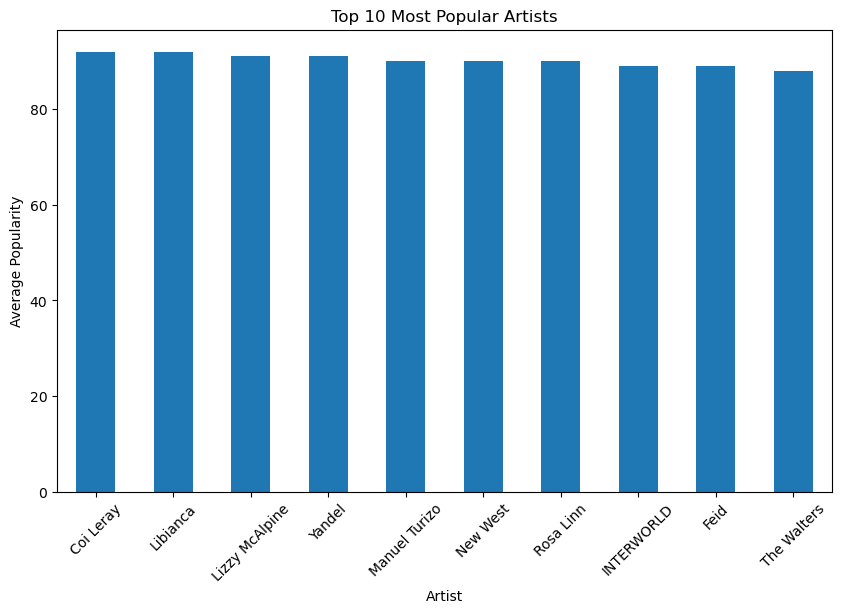

In [44]:
N = 10  # Change N to plot the top N popular artists

top_artists = artist_popularity.head(N)

plt.figure(figsize=(10, 6))
top_artists.plot(kind='bar')
plt.xlabel('Artist')
plt.ylabel('Average Popularity')
plt.title(f'Top {N} Most Popular Artists')
plt.xticks(rotation=45)
plt.show()

In [ ]:
### 2 ### List of Songs Recorded by Each Singer

In [130]:
df_grouped = df.groupby('Artist', as_index=False).count().sort_values(by='Track_Name', ascending=False).head(50)

fig = px.bar(df_grouped, x='Artist', y='Track_Name', labels={'Track_Name': 'Total Songs'}, width=1000, color_discrete_sequence=['green'], text='Track_Name', title='<b>List of Songs for Each Singer')
fig.update_layout(title_x=0.5)

fig.show()

In [ ]:
### 3 ### Top 10 Most Popular Tracks

In [46]:
df_sorted = df.sort_values(by='Popularity', ascending=False)

In [47]:
top_10_tracks = df_sorted.head(10)

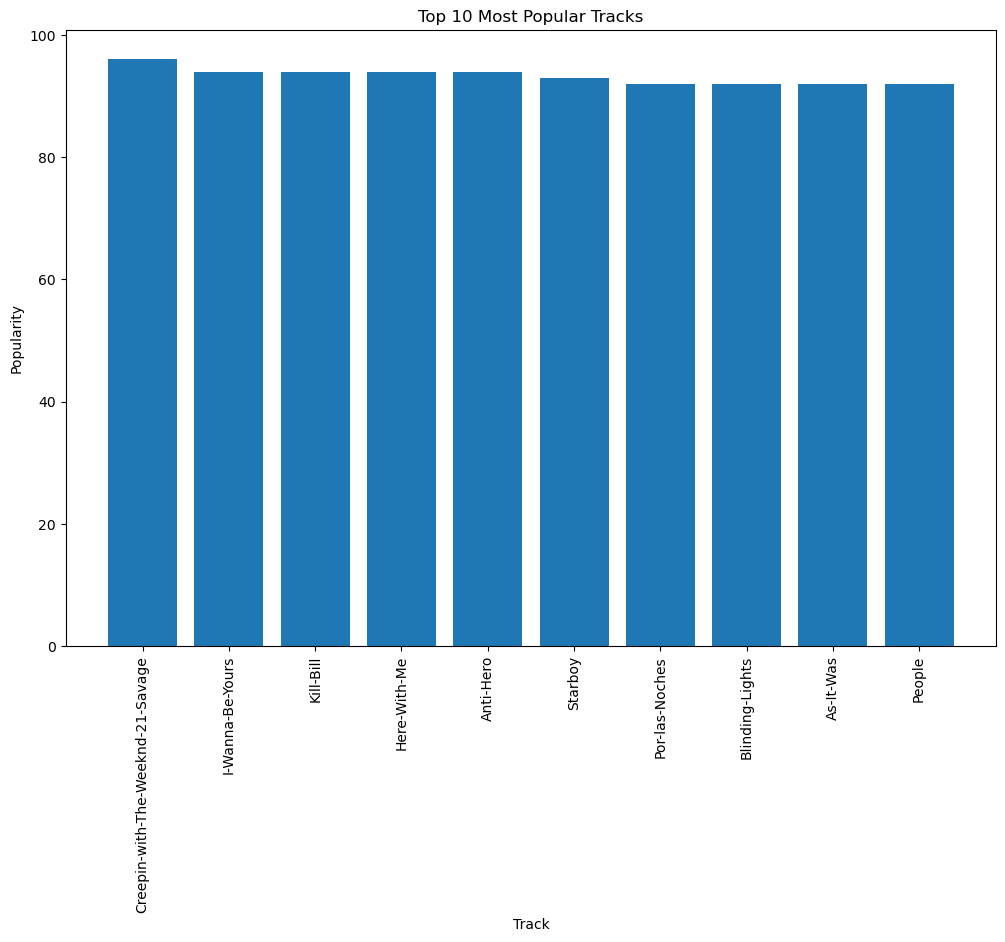

In [48]:
plt.figure(figsize=(12, 8))
plt.bar(top_10_tracks['Track_Name'], top_10_tracks['Popularity'])
plt.xlabel('Track')
plt.ylabel('Popularity')
plt.title('Top 10 Most Popular Tracks')
plt.xticks(rotation=90)
plt.show()


In [50]:
df_sorted = df.sort_values(by='Popularity', ascending=False).head(10)

fig = px.line(df_sorted, x='Track_Name', y='Popularity', hover_data=['Artist'], color_discrete_sequence=['green'], markers=True, title='<b>Top 10 songs in Spotify')
fig.show()

In [ ]:
### 4 treemap visualization of the playlist by singers

In [145]:
# Create the treemap visualization
fig = px.treemap(df, path=[px.Constant('Artist'), 'Artist', 'Genre', 'Track_Name'], values='Popularity', title='<b>TreeMap of Singers Playlist')
fig.update_traces(root_color='lightblue')
fig.update_layout(title_x=0.5)

# Show the treemap
fig.show()

In [ ]:
### 5 To perform an analysis on the release dates of songs and investigate patterns or trends in their distribution

In [51]:
# Assuming your dataframe is named 'df'
df['Release Date'] = pd.to_datetime(df['Release Date'])
df['Year'] = df['Release Date'].dt.year
df['Month'] = df['Release Date'].dt.month

In [52]:
#Count the Number of Songs per Year/Month:
songs_per_year = df.groupby('Year').size()
songs_per_month = df.groupby('Month').size()

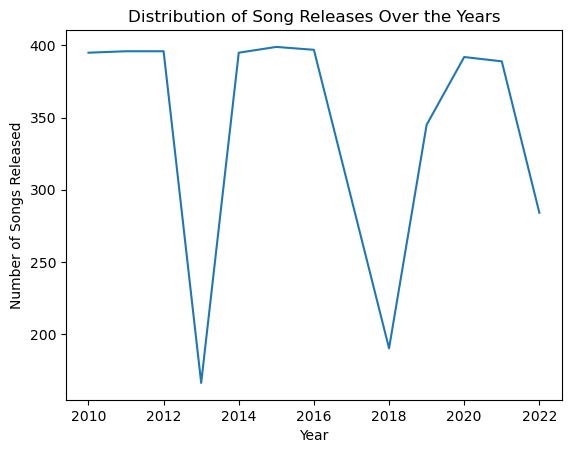

In [53]:
songs_per_year.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Number of Songs Released')
plt.title('Distribution of Song Releases Over the Years')
plt.show()

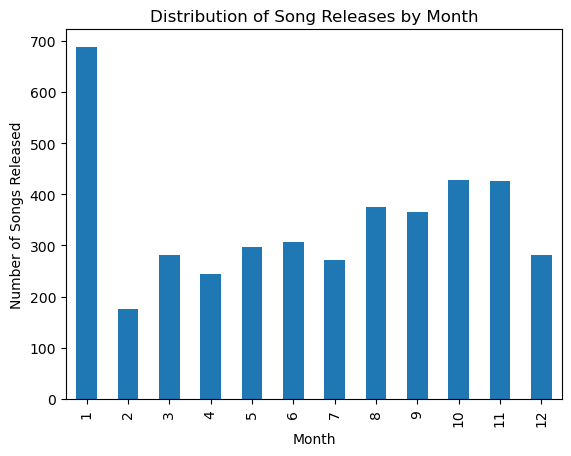

In [54]:
songs_per_month.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Number of Songs Released')
plt.title('Distribution of Song Releases by Month')
plt.show()

In [ ]:
# Corelate with popularity : calculate the average popularity per month:

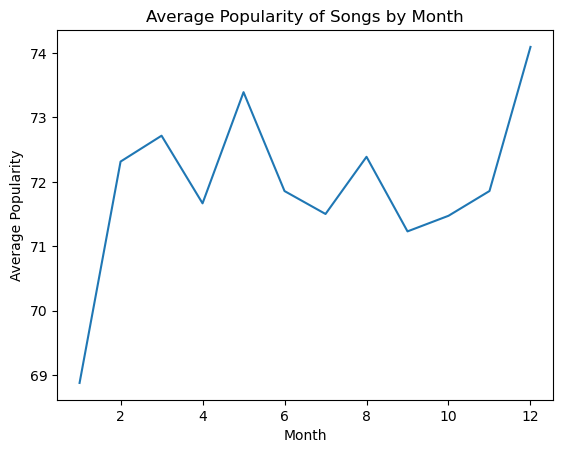

In [55]:
average_popularity_per_month = df.groupby('Month')['Popularity'].mean()
average_popularity_per_month.plot(kind='line')
plt.xlabel('Month')
plt.ylabel('Average Popularity')
plt.title('Average Popularity of Songs by Month')
plt.show()


In [ ]:
### 6 an analysis on the duration of songs and investigate trends in song length, as well as determine if songs 
# have become longer or shorter over the years

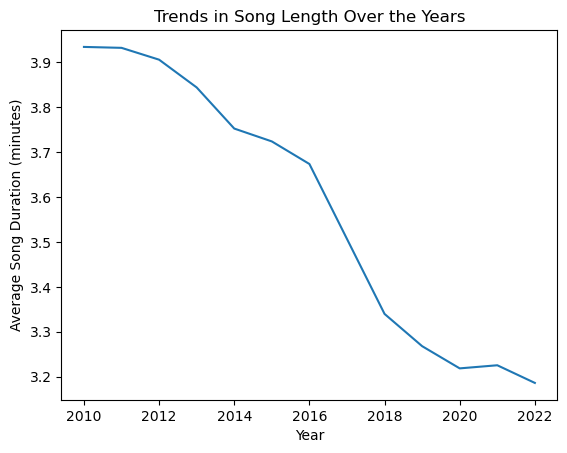

In [56]:
df['Duration (mins)'] = df['Duration (ms)'] / 60000
average_duration_per_year = df.groupby('Year')['Duration (mins)'].mean()
import matplotlib.pyplot as plt

average_duration_per_year.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Average Song Duration (minutes)')
plt.title('Trends in Song Length Over the Years')
plt.show()


In [ ]:
### Corelation Between attributes

C:\Users\Admin\AppData\Local\Temp\ipykernel_13804\1756081375.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



[Text(0.5, 0, 'Danceability'),
 Text(1.5, 0, 'Duration (ms)'),
 Text(2.5, 0, 'Energy'),
 Text(3.5, 0, 'Loudness'),
 Text(4.5, 0, 'Popularity'),
 Text(5.5, 0, 'Year'),
 Text(6.5, 0, 'acousticness'),
 Text(7.5, 0, 'danceability'),
 Text(8.5, 0, 'duration_ms'),
 Text(9.5, 0, 'instrumentalness'),
 Text(10.5, 0, 'liveness'),
 Text(11.5, 0, 'loudness'),
 Text(12.5, 0, 'speechiness'),
 Text(13.5, 0, 'tempo'),
 Text(14.5, 0, 'valence')]

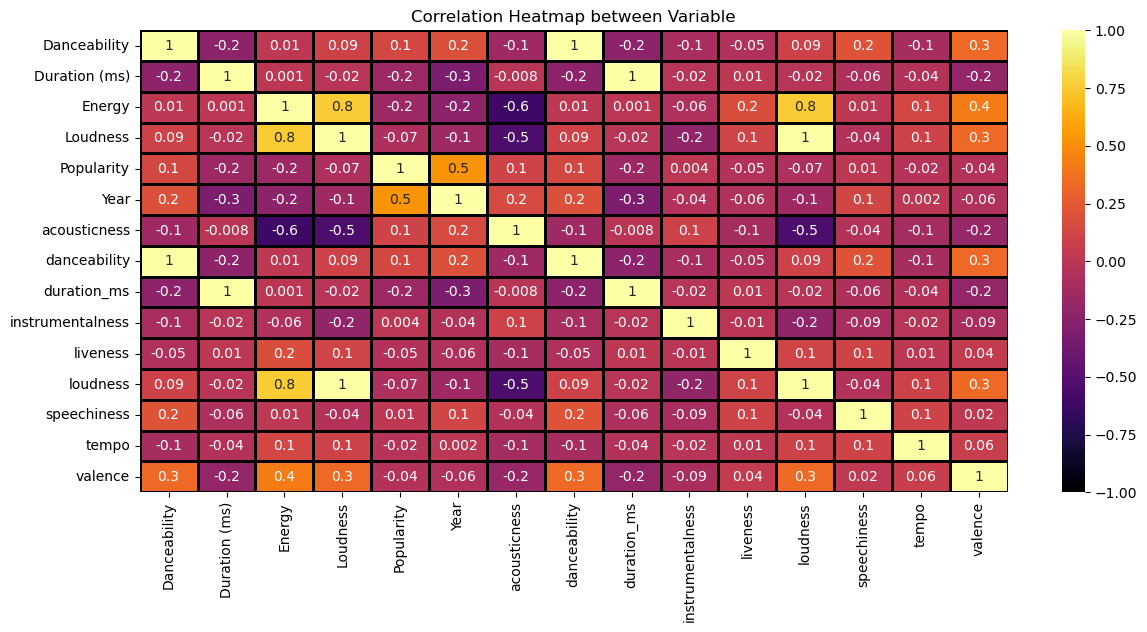

In [75]:
cm = df.corr(method = 'pearson')
plt.figure(figsize=(14,6))
map = sns.heatmap(cm, annot = True, fmt = '.1g', vmin=-1, vmax=1, center=0, cmap='inferno', linewidths=1, linecolor='Black')
map.set_title('Correlation Heatmap between Variable')
map.set_xticklabels(map.get_xticklabels(), rotation=90)

In [153]:
# # Select the variables you want to include in the correlation heatmap
# variables = ['Danceability','Duration (ms)', 'Energy', 'Loudness', 'Popularity', 'Track_Name', 
#              'Year', 'acousticness', 'danceability', 'duration_ms', 'instrumentalness', 'liveness','loudness', 'speechiness', 
#              'tempo','valence']

# # Create a correlation matrix
# correlation_matrix = df[variables].corr()

# # Create a heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
# plt.title('Correlation Heatmap')
# plt.show()

In [76]:
### Create a barplot showing the relationship bewteen years and song durations

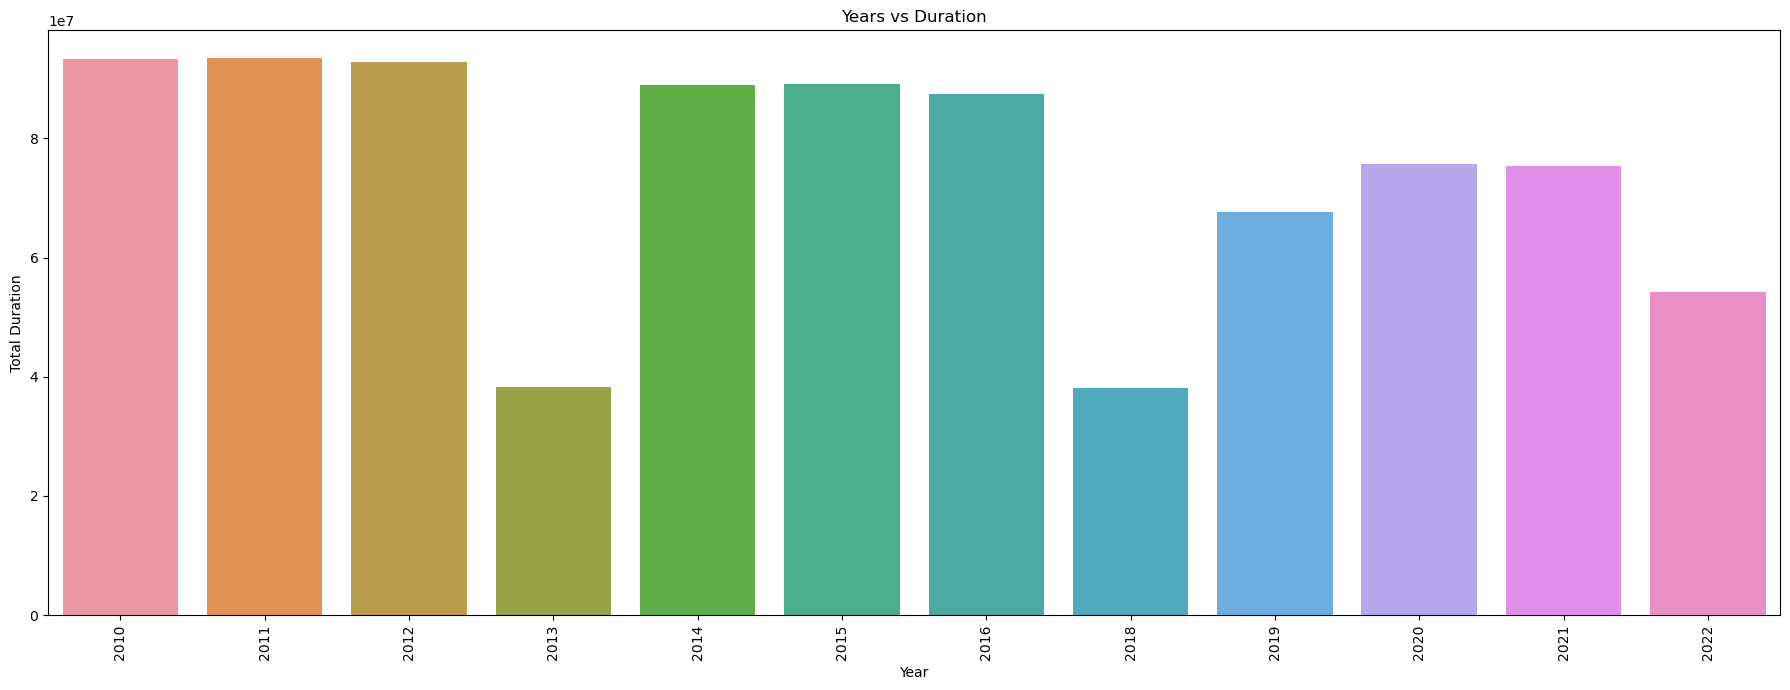

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

total_dr = df.groupby('Year')['duration_ms'].sum().reset_index()
years = total_dr['Year']
total_duration = total_dr['duration_ms']

fig_dims = (18, 7)
fig, ax = plt.subplots(figsize=fig_dims)

sns.barplot(x=years, y=total_duration, ax=ax, errwidth=False)
plt.xticks(rotation=90)
plt.title('Years vs Duration')
plt.xlabel('Year')
plt.ylabel('Total Duration')
plt.tight_layout()
plt.show()

In [ ]:
### Create a barplot showing the relationship bewteen years and song durations for 10 popular song in each year

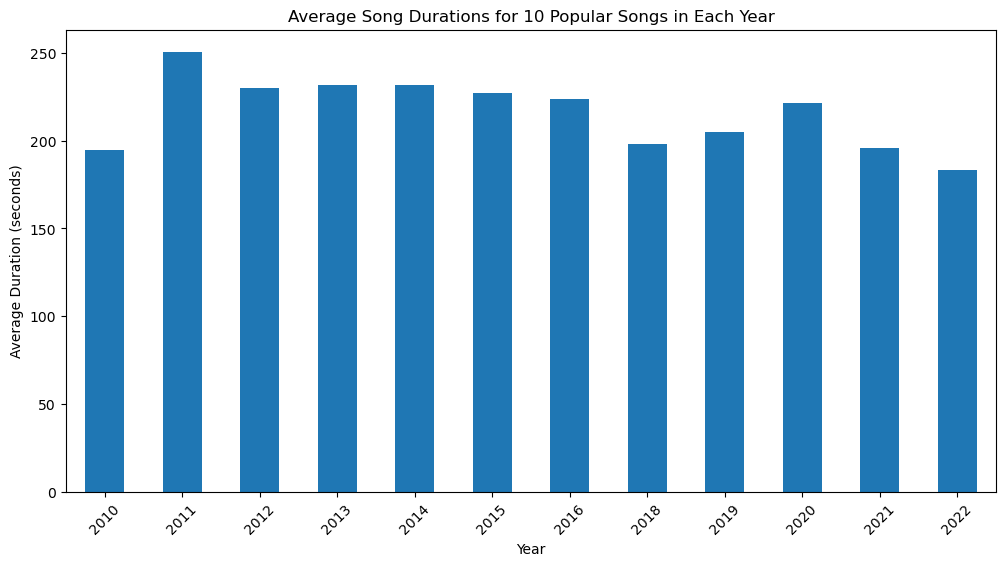

In [78]:
df_sorted = df.sort_values('Popularity', ascending=False)
top_songs_per_year = df_sorted.groupby('Year').head(10)
average_durations_per_year = top_songs_per_year.groupby('Year')['Duration (ms)'].mean() / 1000  # Convert to seconds
plt.figure(figsize=(12, 6))
average_durations_per_year.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Average Duration (seconds)')
plt.title('Average Song Durations for 10 Popular Songs in Each Year')
plt.xticks(rotation=45)
plt.show()


In [ ]:
### Average Popularity of Top Popular Songs Each Year

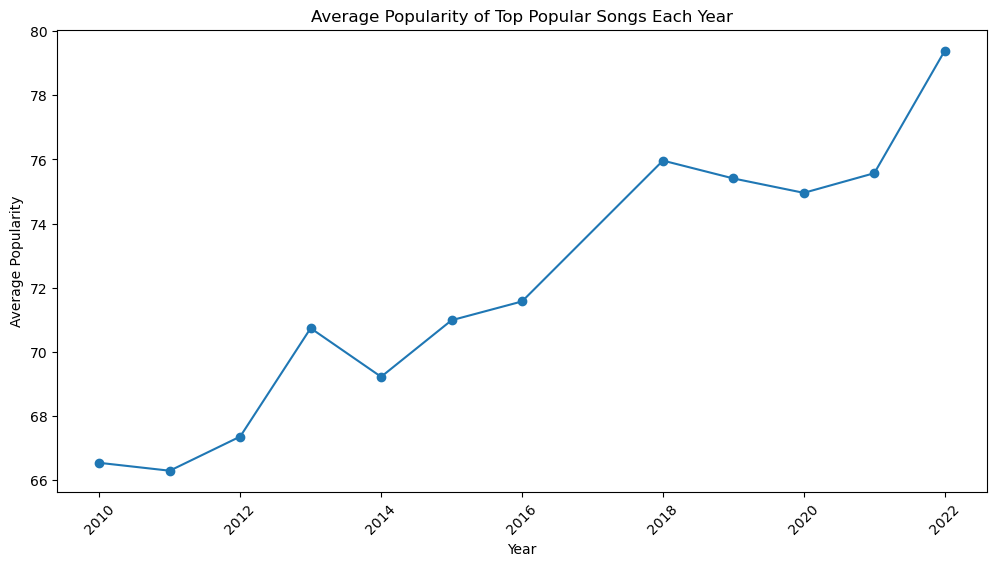

In [79]:
df_sorted = df.sort_values('Popularity', ascending=False)
average_popularity_per_year = df_sorted.groupby('Year')['Popularity'].mean()
plt.figure(figsize=(12, 6))
average_popularity_per_year.plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.title('Average Popularity of Top Popular Songs Each Year')
plt.xticks(rotation=45)
plt.show()


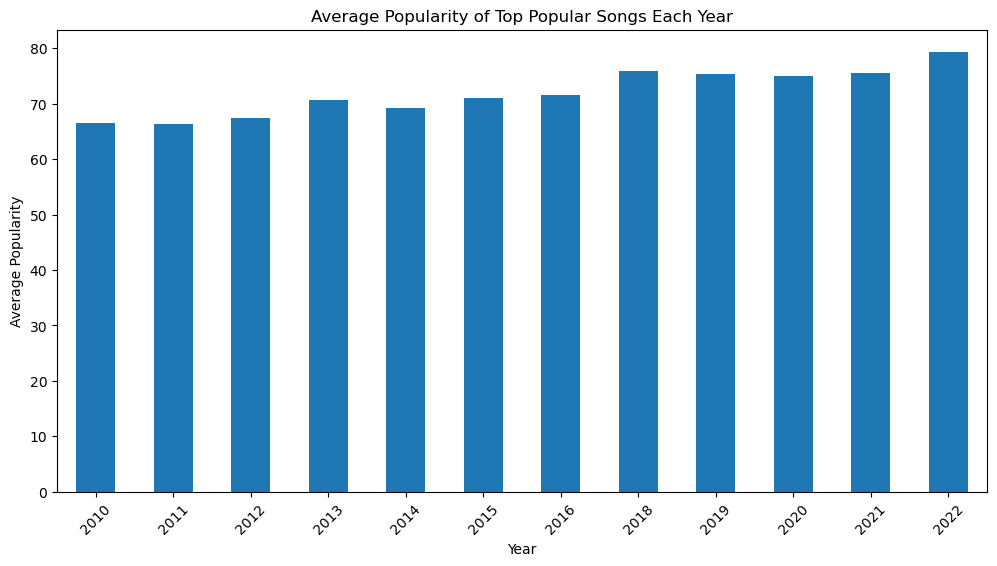

In [81]:
# Create a bar plot to visualize the average popularity over the years
plt.figure(figsize=(12, 6))
average_popularity_per_year.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.title('Average Popularity of Top Popular Songs Each Year')
plt.xticks(rotation=45)
plt.show()

In [ ]:
### Proportion of Genres for Top 10 Popular Songs

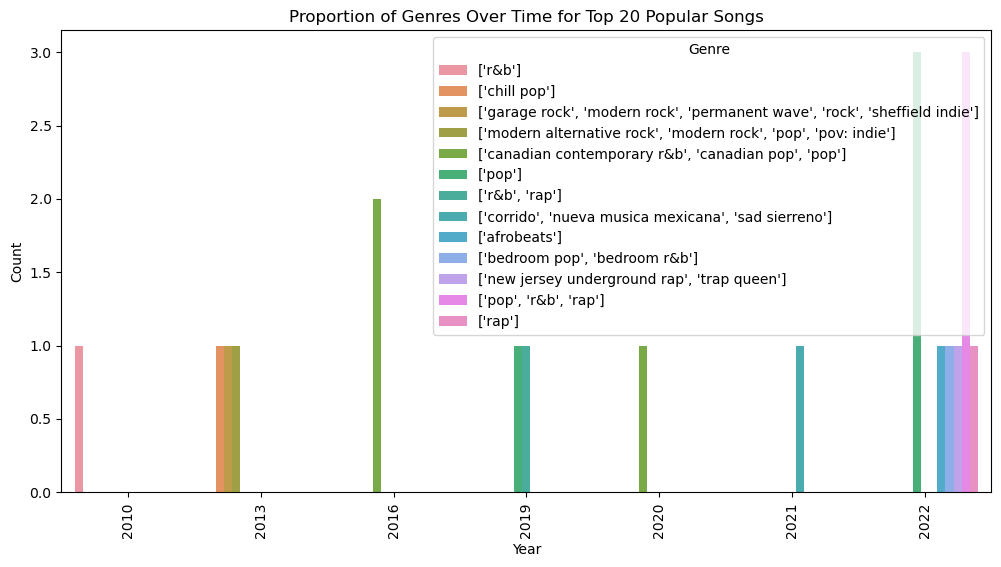

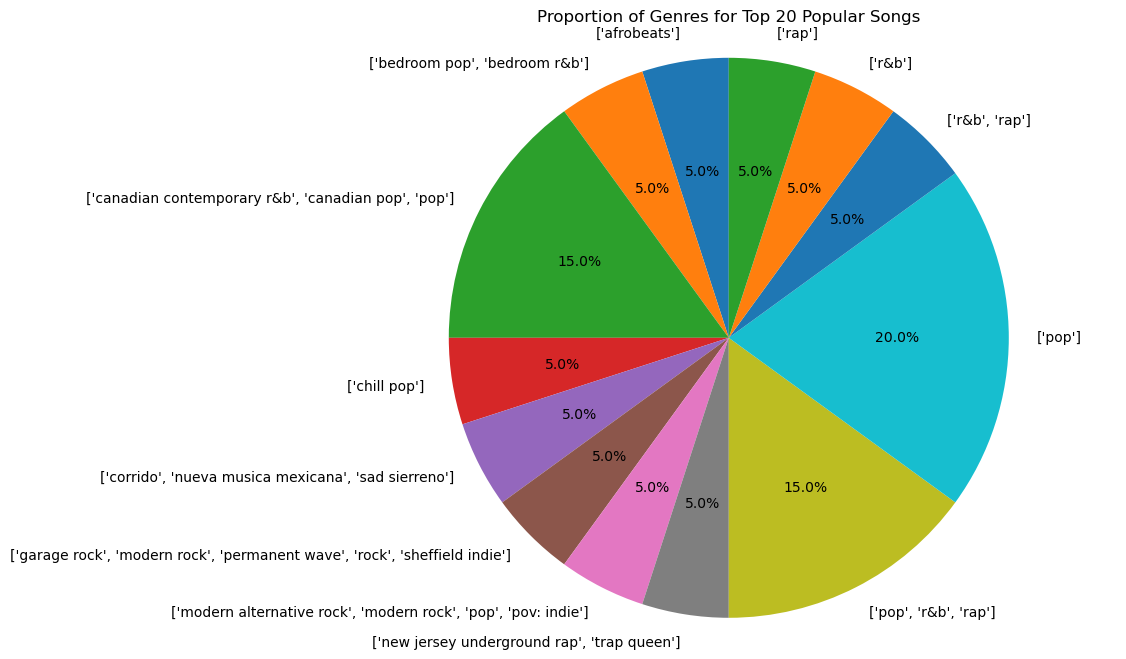

In [84]:
top_10_popular_songs = df.nlargest(20, 'Popularity')

genre_counts = top_10_popular_songs.groupby(['Year', 'Genre']).size().reset_index(name='Count')

# Bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Count', hue='Genre', data=genre_counts)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Proportion of Genres Over Time for Top 20 Popular Songs')
plt.xticks(rotation=90)
plt.legend(title='Genre')
plt.show()

# Pie chart
plt.figure(figsize=(10, 8))
genre_totals = genre_counts.groupby('Genre')['Count'].sum()
plt.pie(genre_totals, labels=genre_totals.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Proportion of Genres for Top 20 Popular Songs')
plt.show()


In [ ]:
### # Analyze the danceability and energy scores of the songs each year from 2010 to 2022,

In [86]:
danceability_trends = df.groupby('Year')['danceability'].mean()
energy_trends = df.groupby('Year')['Energy'].mean()

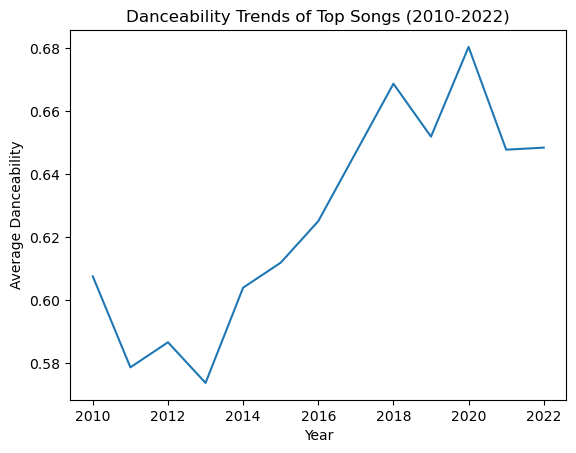

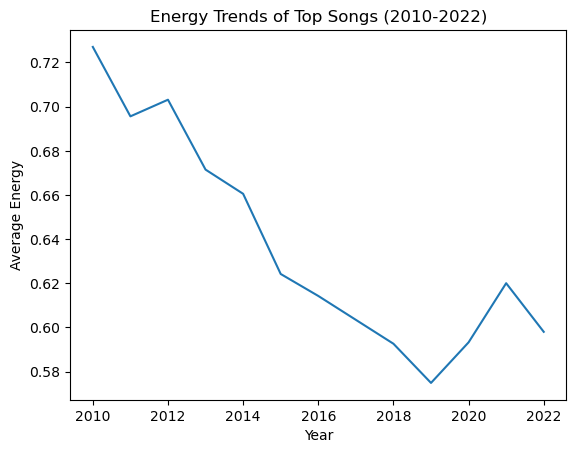

In [87]:
import matplotlib.pyplot as plt

# Line plot for danceability
plt.plot(danceability_trends.index, danceability_trends.values)
plt.xlabel('Year')
plt.ylabel('Average Danceability')
plt.title('Danceability Trends of Top Songs (2010-2022)')
plt.show()

# Line plot for energy
plt.plot(energy_trends.index, energy_trends.values)
plt.xlabel('Year')
plt.ylabel('Average Energy')
plt.title('Energy Trends of Top Songs (2010-2022)')
plt.show()


In [ ]:
### Audio Features Comparison

In [91]:
audio_features = ['danceability', 'Energy', 'loudness', 'valence']
audio_feature_comparison = df.groupby('Year')[audio_features].mean()

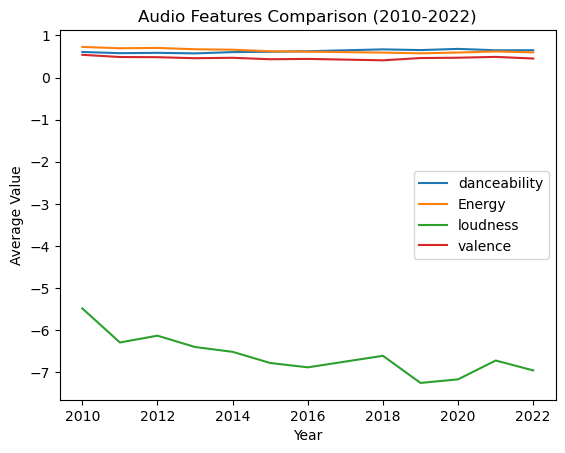

In [92]:
import matplotlib.pyplot as plt

# Plot the line charts for audio feature comparison
for feature in audio_features:
    plt.plot(audio_feature_comparison.index, audio_feature_comparison[feature], label=feature)

plt.xlabel('Year')
plt.ylabel('Average Value')
plt.title('Audio Features Comparison (2010-2022)')
plt.legend()
plt.show()


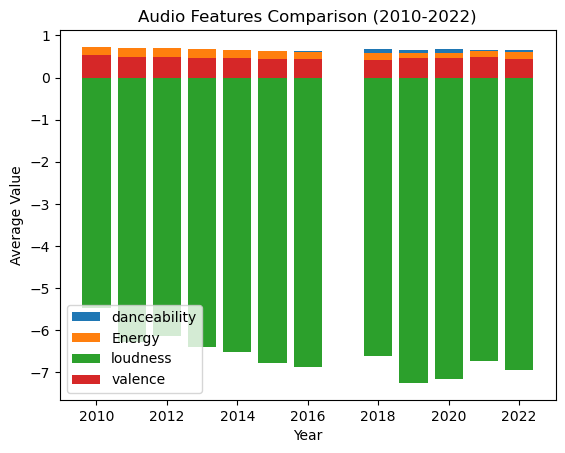

In [93]:
# Plot the bar charts for audio feature comparison
for feature in audio_features:
    plt.bar(audio_feature_comparison.index, audio_feature_comparison[feature], label=feature)

plt.xlabel('Year')
plt.ylabel('Average Value')
plt.title('Audio Features Comparison (2010-2022)')
plt.legend()
plt.show()


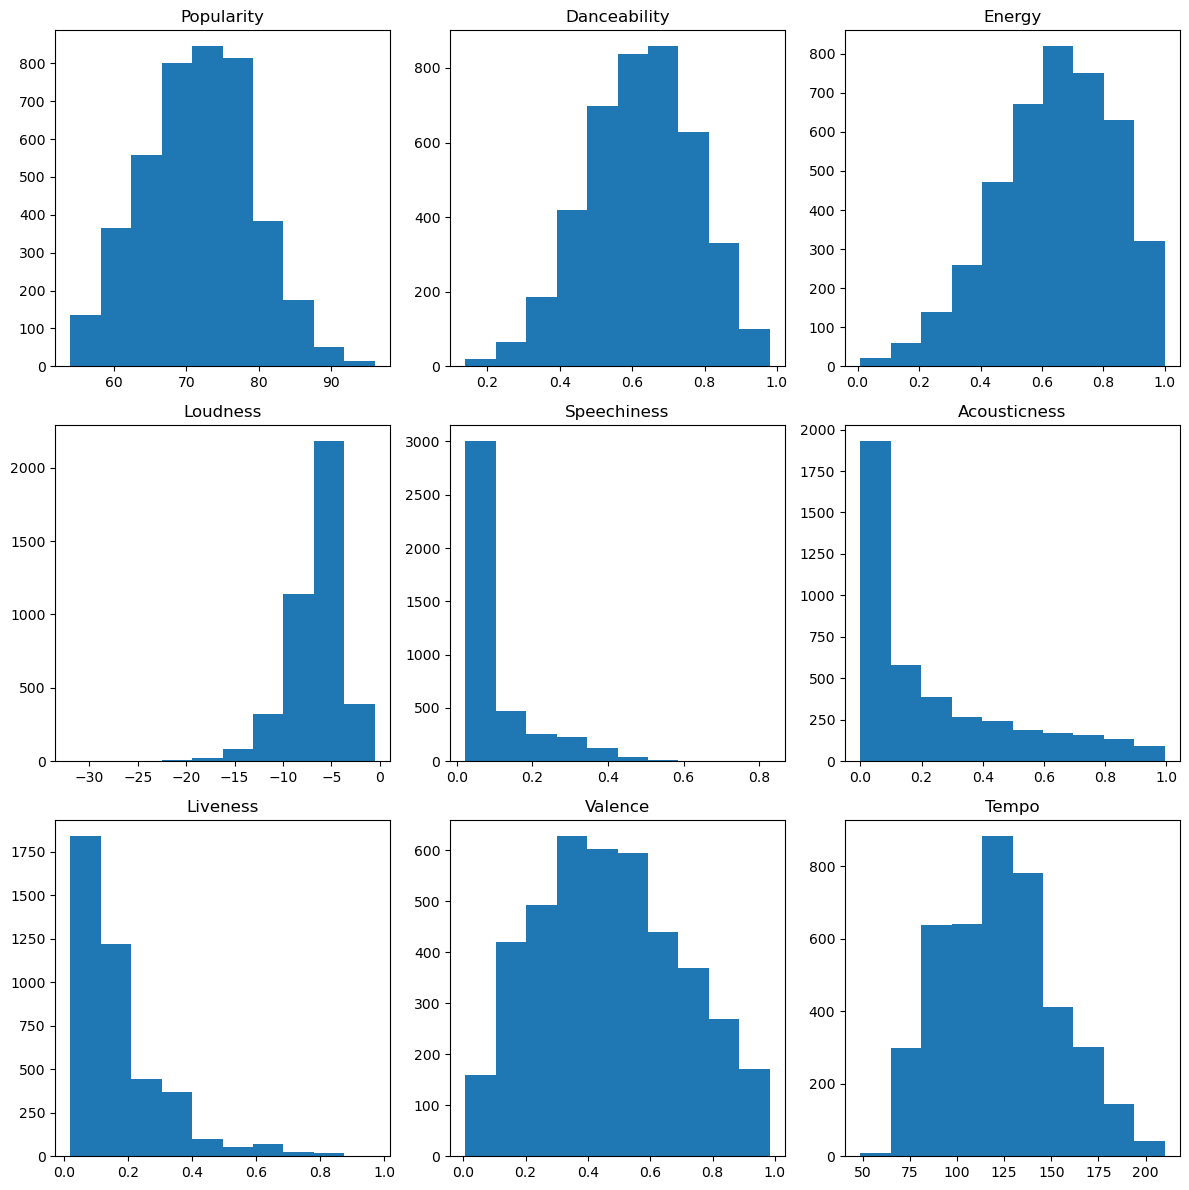

In [100]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))

axes[0, 0].hist(df['Popularity'])
axes[0, 0].set_title('Popularity')

axes[0, 1].hist(df['Danceability'])
axes[0, 1].set_title('Danceability')

axes[0, 2].hist(df['Energy'])
axes[0, 2].set_title('Energy')

axes[1, 0].hist(df['Loudness'])
axes[1, 0].set_title('Loudness')

axes[1, 1].hist(df['speechiness'])
axes[1, 1].set_title('Speechiness')

axes[1, 2].hist(df['acousticness'])
axes[1, 2].set_title('Acousticness')

axes[2, 0].hist(df['liveness'])
axes[2, 0].set_title('Liveness')

axes[2, 1].hist(df['valence'])
axes[2, 1].set_title('Valence')

axes[2, 2].hist(df['tempo'])
axes[2, 2].set_title('Tempo')

plt.tight_layout()
plt.show()


In [ ]:
### Compute the correlation matrix for the selected audio features

In [98]:
audio_features = ['danceability', 'Energy', 'loudness', 'valence']
# audio_feature_comparison = df.groupby('Year')[audio_features].mean()/
correlation_matrix = df[audio_features].corr()



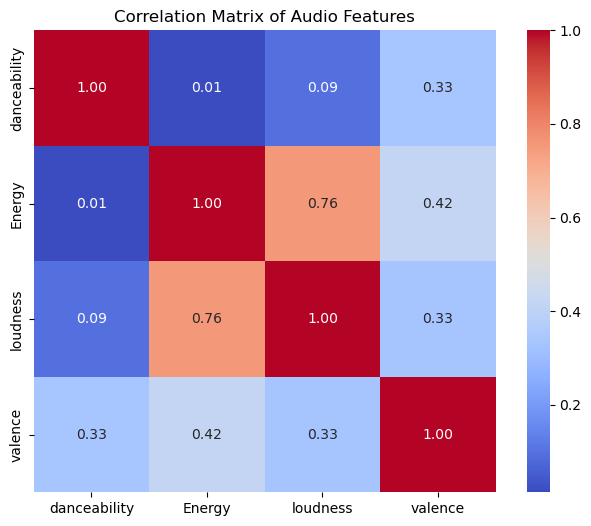

In [99]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Audio Features')
plt.show()


In [ ]:
### Analyze the number of words in each popular song in each year and its distribution

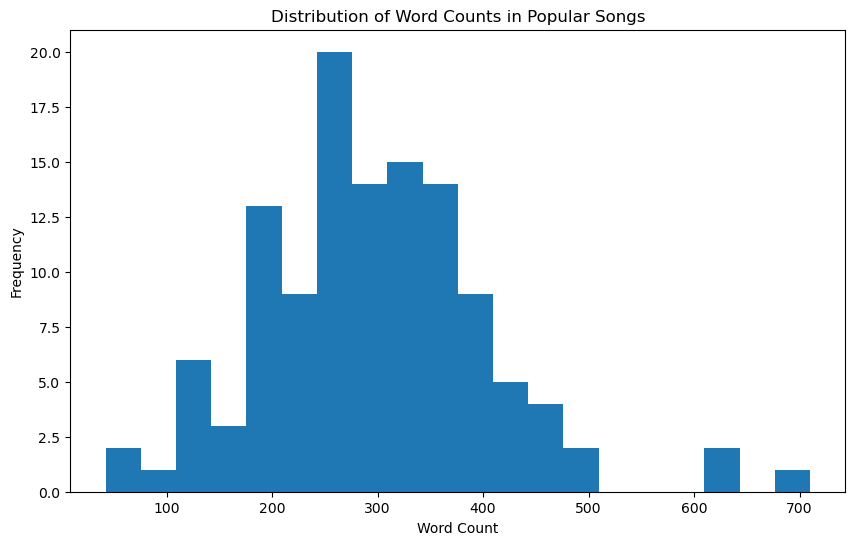

In [106]:
top_songs = df.groupby('Year').apply(lambda x: x.nlargest(10, 'Popularity')).reset_index(drop=True)
top_songs = top_songs.dropna(subset=['Lyrics'])
top_songs['Word_Count'] = top_songs['Lyrics'].str.split().apply(len)
word_count_stats = top_songs['Word_Count'].describe()

plt.figure(figsize=(10, 6))
top_songs['Word_Count'].plot(kind='hist', bins=20)
plt.title("Distribution of Word Counts in Popular Songs")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()


In [ ]:
### Audio Features Comparison

In [143]:
fig = px.scatter(df, x='tempo', y='Popularity', color='tempo', color_continuous_scale=['blue', 'green'], title='<b>Tempo Versus Popularity')
fig.update_layout(template='ggplot2', plot_bgcolor='grey')
fig.show()


In [ ]:
### Speechiness Versus Popularity

In [142]:
fig = px.scatter(df,x='speechiness',y='Popularity', color='tempo', color_continuous_scale=['blue', 'green'], title='<b>Speechiness Versus Popularity')
fig.update_layout(template='ggplot2', plot_bgcolor='grey')
fig.show()

In [152]:
fig = px.scatter(df,x='Energy',y='Loudness',color_continuous_scale=['blue', 'green'],title='<b>Energy versus Loudness correlation')
fig.update_layout(template='ggplot2', plot_bgcolor='grey')  # Set the template to 'ggplot2' and background color to black
fig.show()

In [ ]:
### Analyse and plot the popular songs that are longest and shortest

In [131]:
df_sorted = df.sort_values('Duration (ms)', ascending=True)
shortest_songs = df_sorted.head(10)  # Assuming you want to select the top 10 shortest songs
longest_songs = df_sorted.tail(10)   # Assuming you want to select the top 10 longest songs


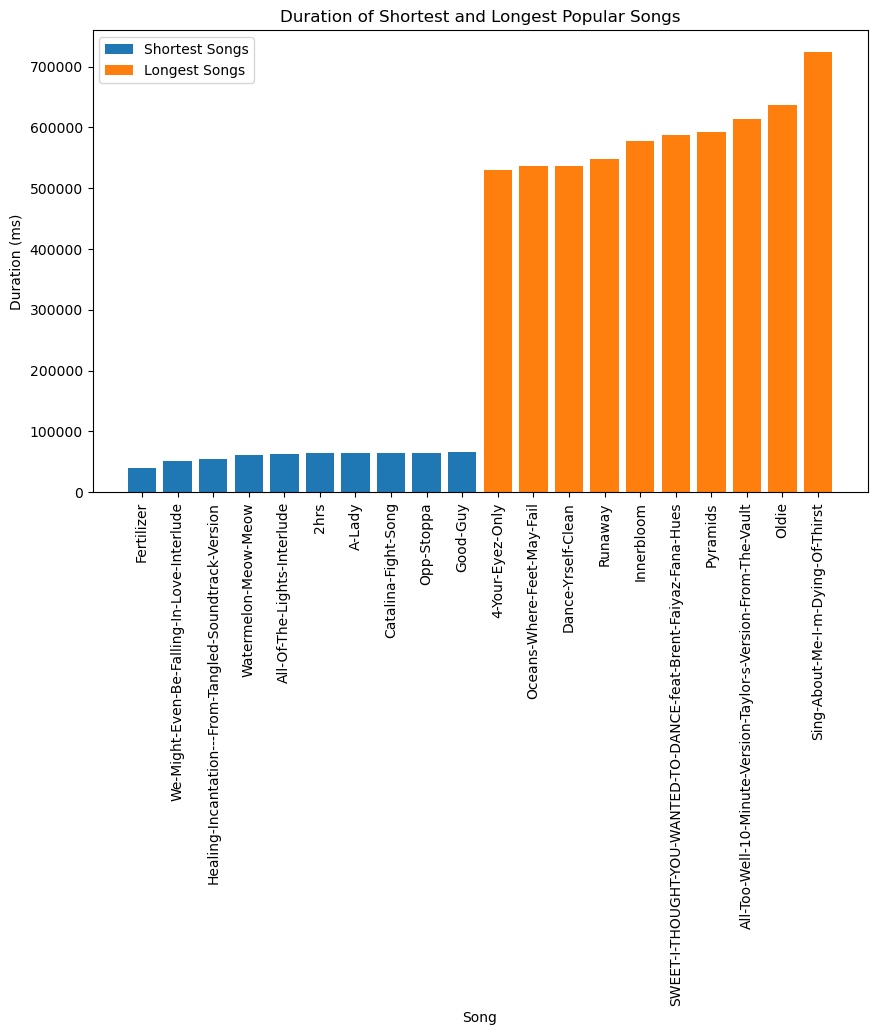

In [132]:
plt.figure(figsize=(10, 6))
plt.bar(shortest_songs['Track_Name'], shortest_songs['Duration (ms)'], label='Shortest Songs')
plt.bar(longest_songs['Track_Name'], longest_songs['Duration (ms)'], label='Longest Songs')
plt.xticks(rotation=90)
plt.title('Duration of Shortest and Longest Popular Songs')
plt.xlabel('Song')
plt.ylabel('Duration (ms)')
plt.legend()
plt.show()


In [ ]:
### Analyse and plot the popular songs that are longest and shortest for each year

In [133]:
grouped_df = df.groupby('Year')
shortest_songs = grouped_df.apply(lambda x: x.nsmallest(1, 'Duration (ms)')).reset_index(drop=True)
longest_songs = grouped_df.apply(lambda x: x.nlargest(1, 'Duration (ms)')).reset_index(drop=True)


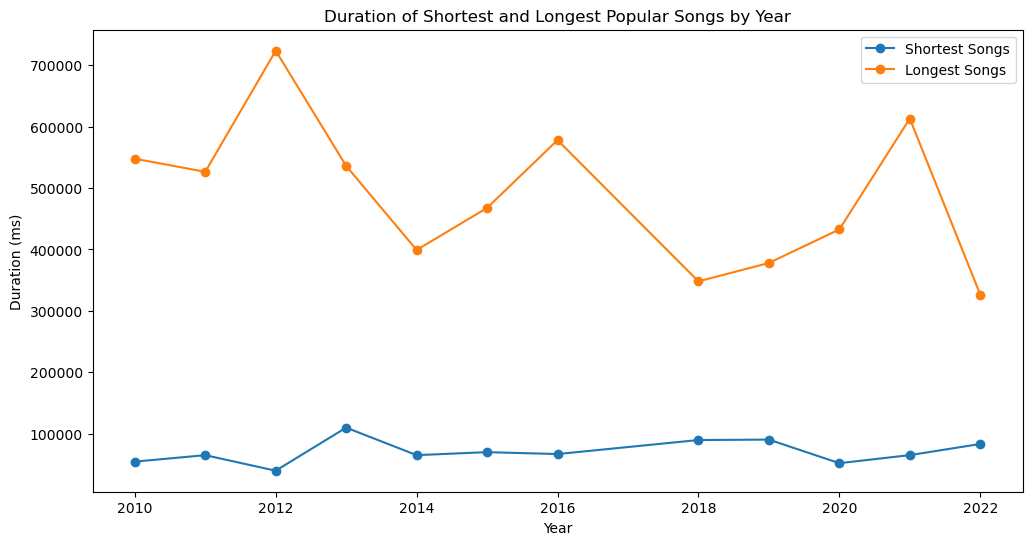

In [134]:
plt.figure(figsize=(12, 6))
plt.plot(shortest_songs['Year'], shortest_songs['Duration (ms)'], marker='o', label='Shortest Songs')
plt.plot(longest_songs['Year'], longest_songs['Duration (ms)'], marker='o', label='Longest Songs')
plt.xlabel('Year')
plt.ylabel('Duration (ms)')
plt.title('Duration of Shortest and Longest Popular Songs by Year')
plt.legend()
plt.show()


In [ ]:
### Cean and preprocess the lyrics data to remove any noise or irrelevant information. This can involve steps such 
#   as removing punctuation, converting text to lowercase, and removing stopwords.

In [27]:
# Group the songs by year
grouped_by_year = df.groupby('Year')

# Perform keyword extraction for each year
for year, group in grouped_by_year:
    # Select the top popular songs for the current year
    top_songs = group.nlargest(10, 'Popularity')
    
    # Preprocess the lyrics
    preprocessed_lyrics = top_songs['Lyrics'].apply(preprocess_lyrics)

In [28]:
preprocessed_lyrics

2889    ooh oohoohoohoohooh ooh oohooh cant believe ma...
2890    im still fan even though saltyhate see broad k...
2892    thing get olderbut never wisermidnights become...
2900    watch sun rise along coastas getting oldi cant...
2894    oohi think knowill touch fire youi three four ...
2897    yeahcause girls players uhyeah yeahcause girls...
2898    im still fan even though saltyhate see broad k...
2907    come harry wan na say goodnight youholding bac...
2914    come harry wan na say goodnight youholding bac...
2940    ohohohohmhmm mhmmfrom bamenda libiancaohohive ...
Name: Lyrics, dtype: object

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import nltk
nltk.download('punkt')

# Download stopwords if not already downloaded
nltk.download('stopwords')

In [25]:


# # Function to preprocess lyrics
# def preprocess_lyrics(lyrics):
#     # Convert to lowercase
#     lyrics = lyrics.lower()

#     # Remove punctuation
#     lyrics = lyrics.translate(str.maketrans('', '', string.punctuation))

#     # Tokenize the lyrics
#     tokens = word_tokenize(lyrics)

#     # Remove stopwords
#     stop_words = set(stopwords.words('english'))
#     tokens = [token for token in tokens if token not in stop_words]

#     # Join the tokens back into a string
#     preprocessed_lyrics = ' '.join(tokens)

#     return preprocessed_lyrics

# # Apply preprocessing to the lyrics column
# df['Preprocessed_Lyrics'] = df['Lyrics'].apply(preprocess_lyrics)


In [33]:
# df['Preprocessed_Lyrics']

In [ ]:
#Perform keyword extraction: You can use either TF-IDF or TextRank to extract keywords from the preprocessed lyrics. Here's an example for each technique:
#a. TF-IDF (Term Frequency-Inverse Document Frequency):

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the preprocessed lyrics
tfidf_matrix = tfidf_vectorizer.fit_transform(preprocessed_lyrics)

# Get the feature names (keywords)
feature_names = tfidf_vectorizer.get_feature_names_out()


In [30]:
tfidf_matrix

<10x602 sparse matrix of type '<class 'numpy.float64'>'
	with 882 stored elements in Compressed Sparse Row format>

In [31]:
# Calculate the average TF-IDF score for each keyword
average_tfidf_scores = tfidf_matrix.mean(axis=0).tolist()[0]
keyword_scores = list(zip(feature_names, average_tfidf_scores))

# Sort the keyword scores by the TF-IDF score in descending order
keyword_scores = sorted(keyword_scores, key=lambda x: x[1], reverse=True)


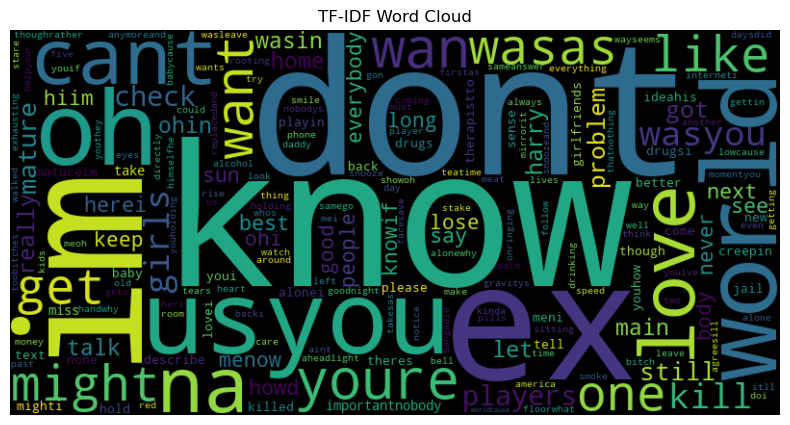

In [42]:
# Create a dictionary of keyword scores
keyword_scores_dict = {keyword: score for keyword, score in keyword_scores}

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(keyword_scores_dict)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('TF-IDF Word Cloud')
plt.show()


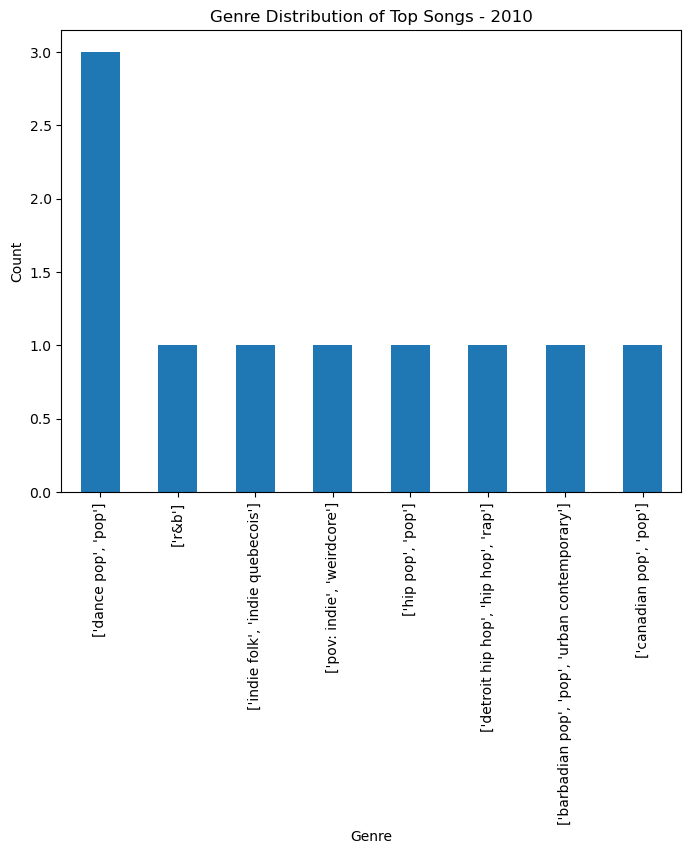

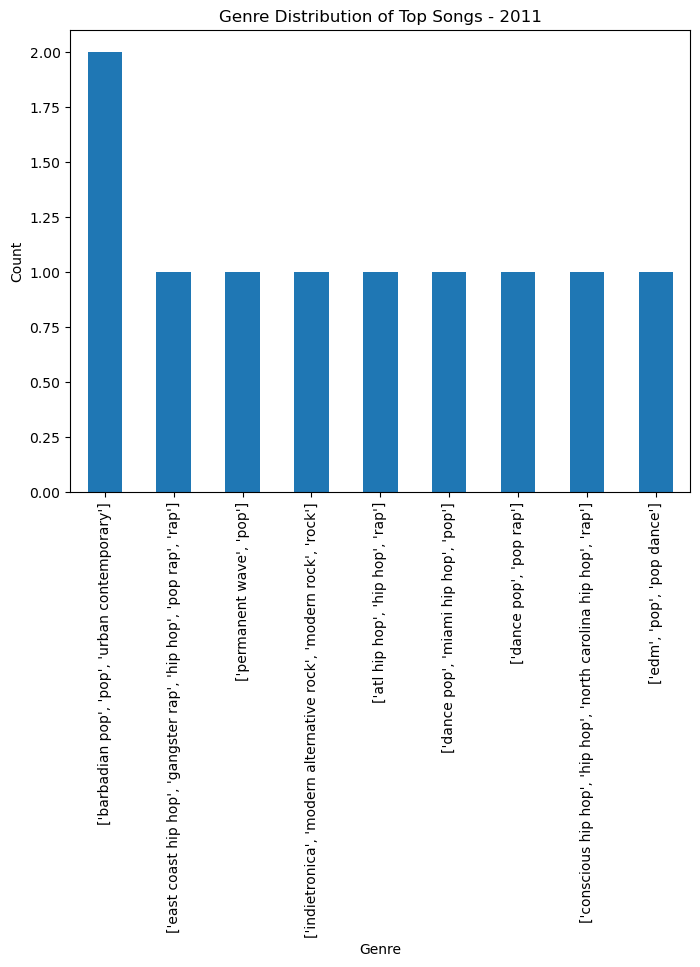

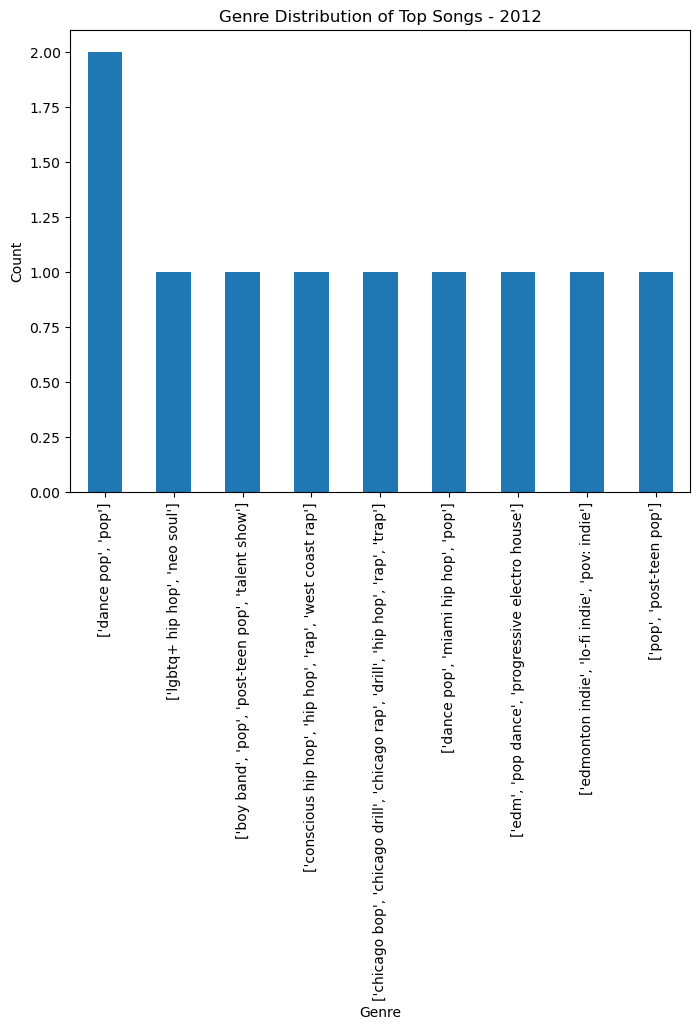

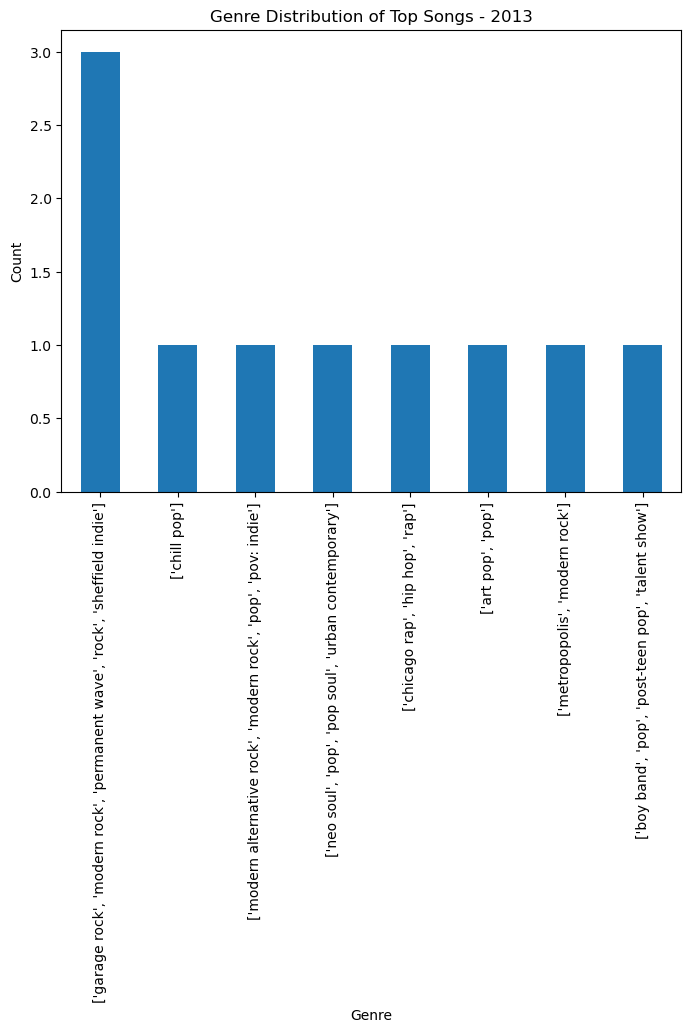

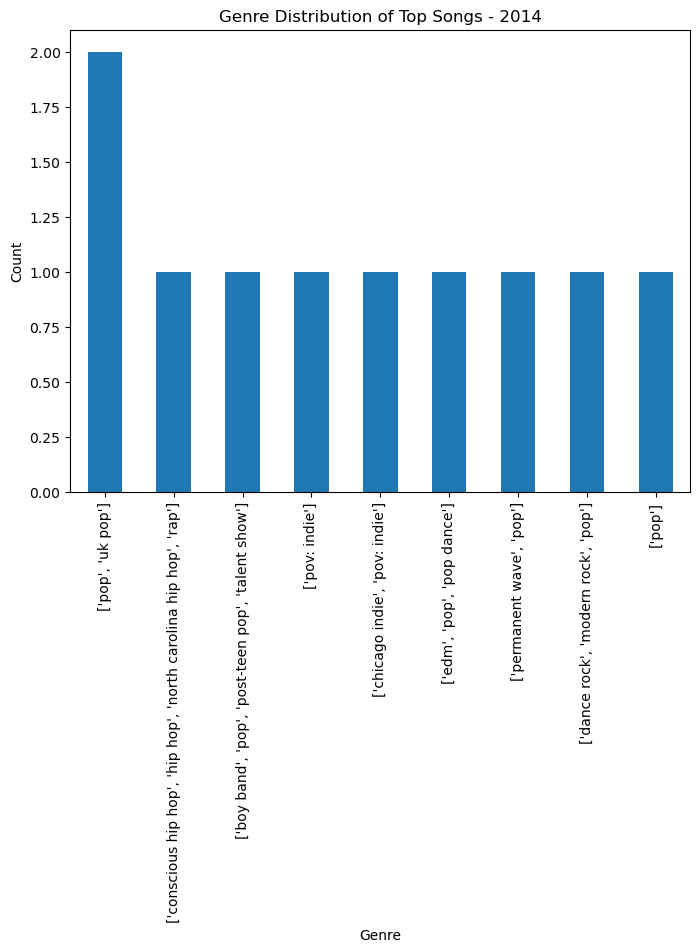

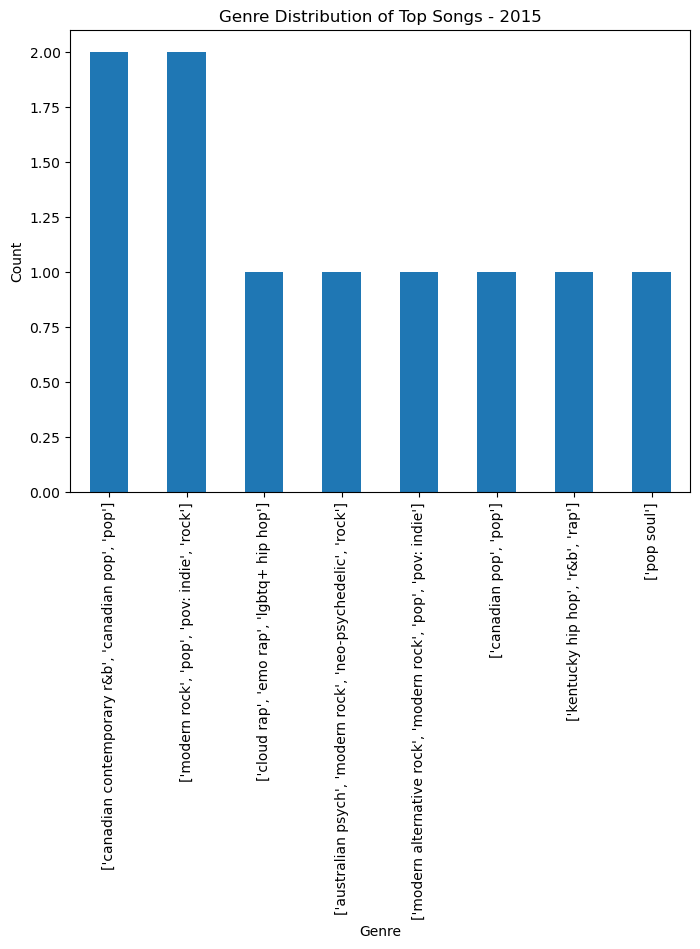

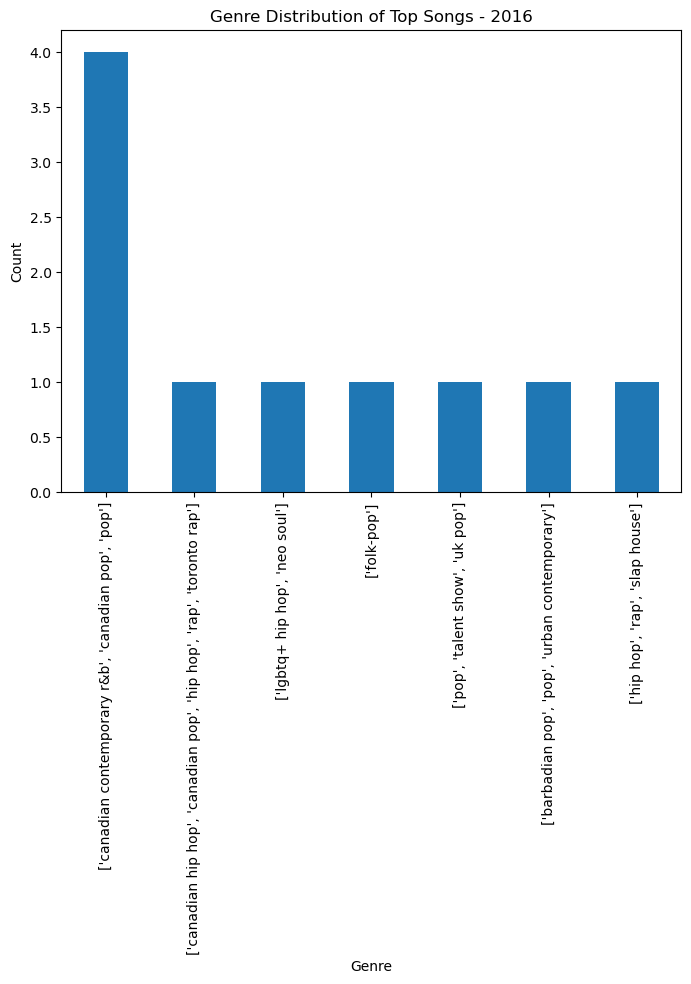

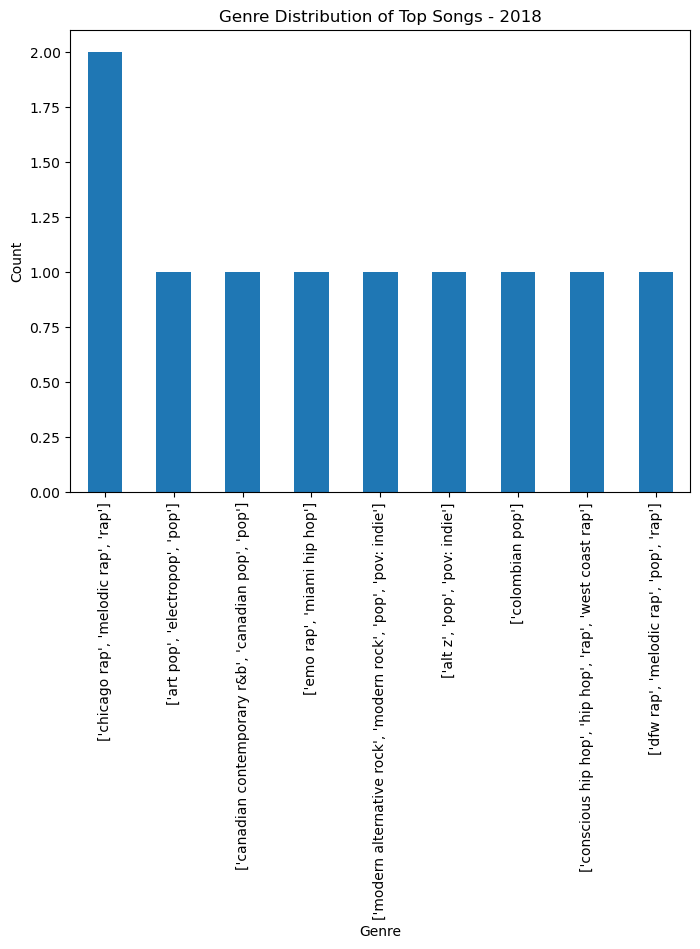

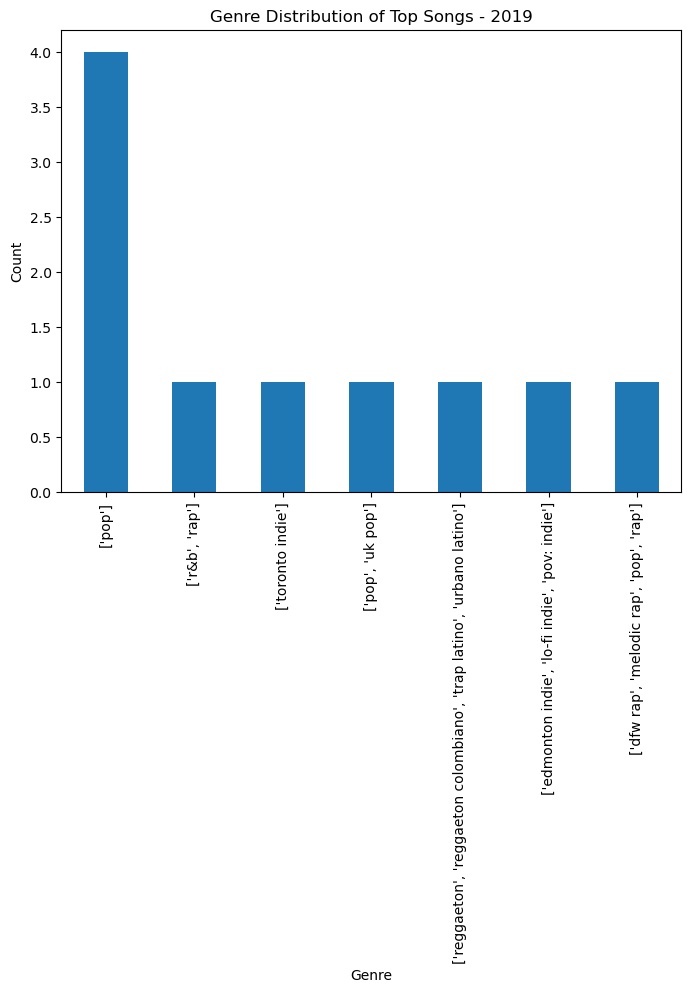

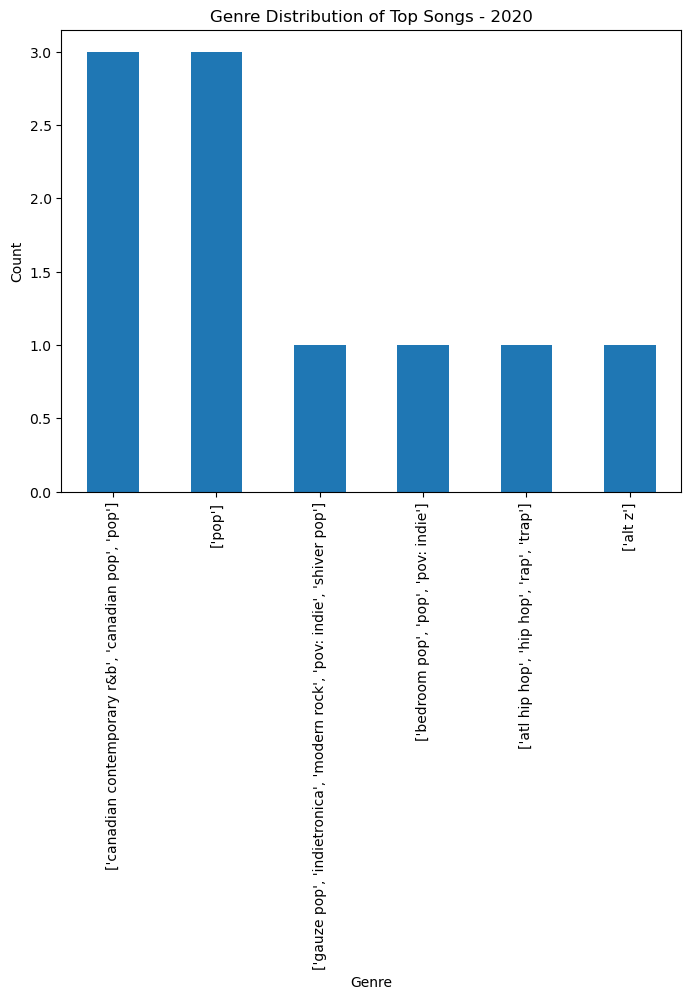

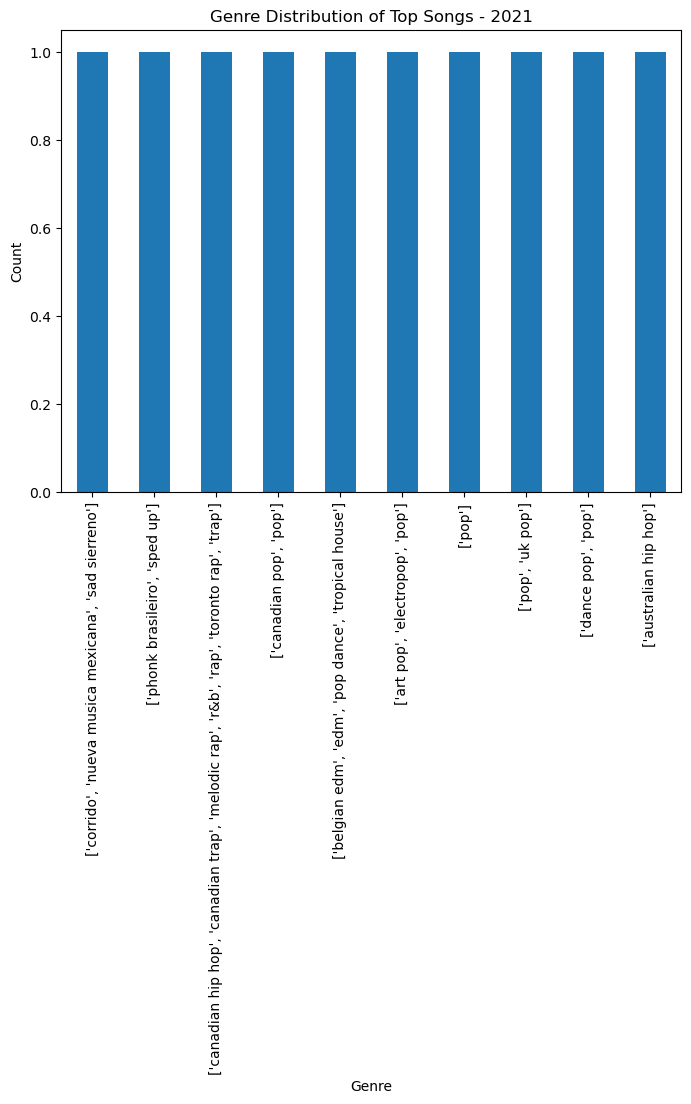

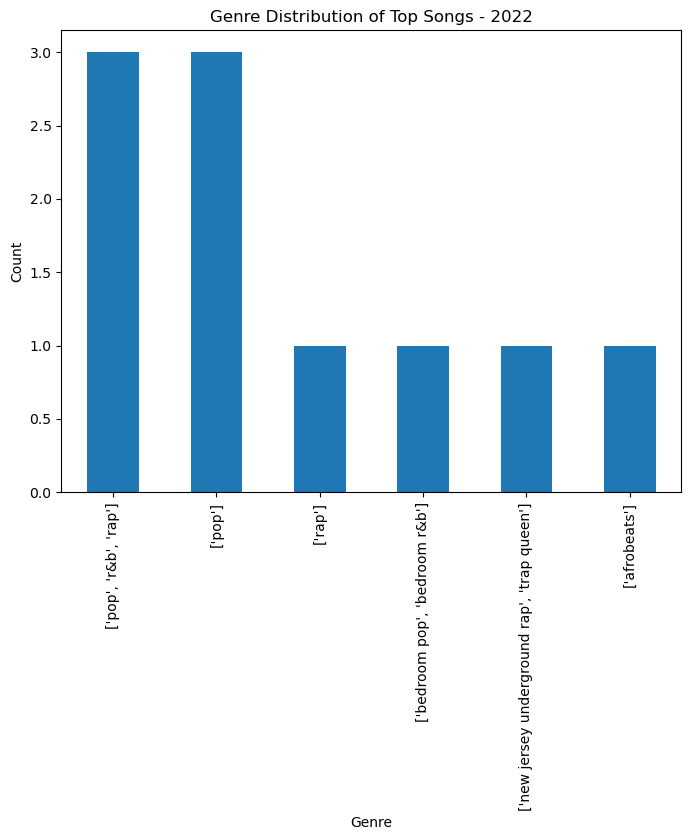

In [45]:
# Group the songs by year
grouped_by_year = df.groupby('Year')

# Iterate over each year and plot the genre distribution of the top popular songs
for year, group in grouped_by_year:
    # Select the top popular songs for the current year
    top_songs = group.nlargest(10, 'Popularity')
    
    # Count the occurrences of each genre in the top songs
    genre_counts = top_songs['Genre'].value_counts()
    
    # Plot the genre distribution
    plt.figure(figsize=(8, 6))
    genre_counts.plot(kind='bar')
    plt.xlabel('Genre')
    plt.ylabel('Count')
    plt.title(f'Genre Distribution of Top Songs - {year}')
    plt.xticks(rotation=90)
    plt.show()





In [ ]:
# # Remove unwanted characters and symbols
# df['Lyrics'] = df['Lyrics'].apply(lambda x: re.sub('[^a-zA-Z\s]', '', str(x)))

# # Convert lyrics to lowercase
# df['Lyrics'] = df['Lyrics'].apply(lambda x: x.lower().strip())
